In [1]:
import pandas as pd
from scipy.stats import trim_mean
import numpy as np
import wquantiles
from statsmodels import robust

In [2]:
state = pd.read_csv("../data/state.csv")

In [3]:
state.Population.mean()

np.float64(6162876.3)

In [4]:
trim_mean(state.Population, 0.1)

np.float64(4783697.125)

In [5]:
state.Population.median()

np.float64(4436369.5)

In [6]:
np.average(state['Murder.Rate'], weights = state['Population'])

np.float64(4.445833981123393)

In [7]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

np.float64(4.4)

In [8]:
state['Population'].std()

np.float64(6848235.347401142)

In [9]:
state['Population'].quantile(.75) - state['Population'].quantile(0.25)

np.float64(4847308.0)

In [10]:
robust.scale.mad(state['Population'])

np.float64(3849876.1459979336)

In [11]:
state['Murder.Rate'].quantile([0.05, .25, .5, .75, .95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

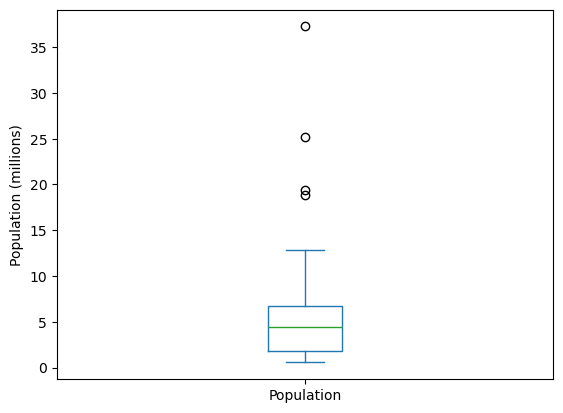

In [12]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

In [13]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

Text(0.5, 0, 'Population (millions)')

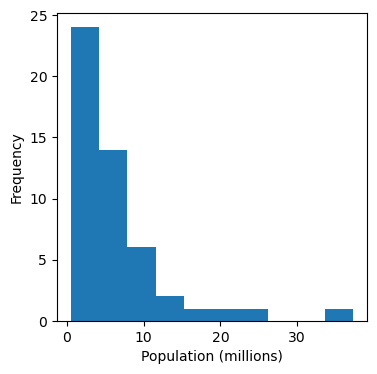

In [14]:
ax = (state['Population']/1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel("Population (millions)")

Text(0.5, 0, 'Murder Rate (per 100,000)')

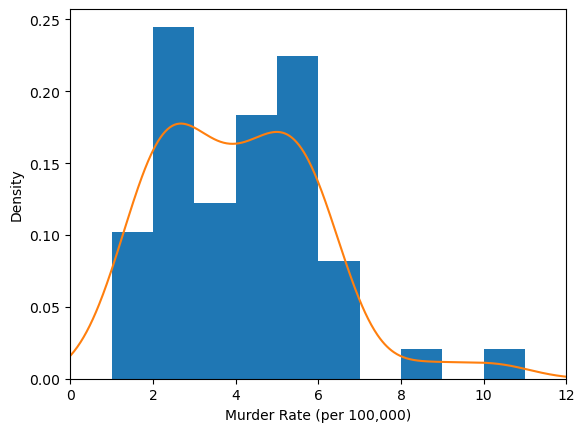

In [15]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel("Murder Rate (per 100,000)")

In [16]:
dfw = pd.read_csv("../data/dfw_airline.csv")
# dfw.head()
dfw.shape

(1, 5)

Text(0, 0.5, 'Count')

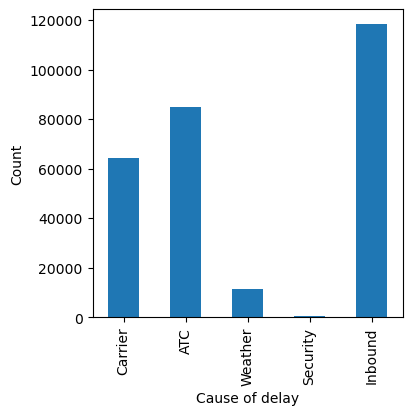

In [17]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

In [18]:
sp500_px = pd.read_csv("../data/sp500_data.csv.gz", index_col=0)
sp500_sym = pd.read_csv("../data/sp500_sectors.csv")

In [19]:
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [20]:
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [21]:
sp500_sym[sp500_sym['sector'] == 'etf']['symbol']

315    XLI
316    QQQ
317    SPY
318    DIA
319    GLD
320    VXX
321    USO
322    IWM
323    XLE
324    XLY
325    XLU
326    XLB
327    XTL
328    XLV
329    XLP
330    XLF
331    XLK
Name: symbol, dtype: object

In [22]:
etfs = sp500_px.loc[sp500_px.index > "2012-07-01", sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]

<Axes: >

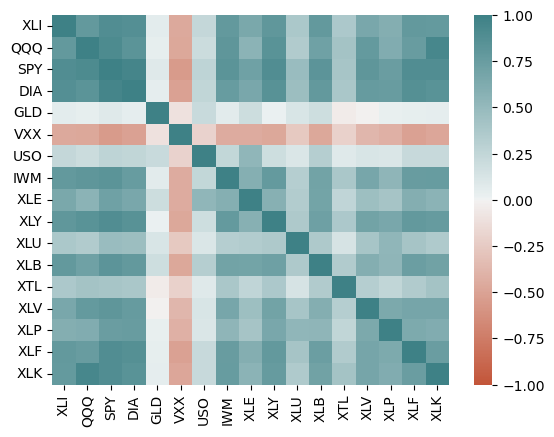

In [23]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = etfs.corr()

# Create a heatmap
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap = \
            sns.diverging_palette(20, 200, as_cmap=True))

In [24]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

In [25]:
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]

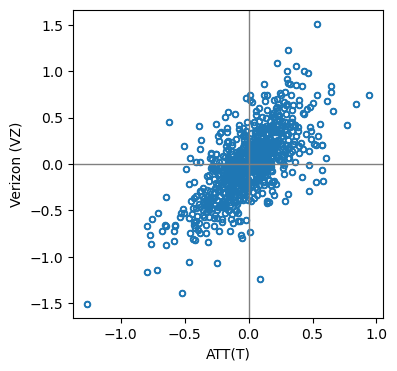

In [26]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4,4), marker='$\u25CB$')
ax.set_xlabel("ATT(T)")
ax.set_ylabel("Verizon (VZ)")
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

In [27]:
kc_tax = pd.read_csv("../data/kc_tax.csv.gz")

In [28]:
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [29]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & (kc_tax.SqFtTotLiving > 100) & (kc_tax.SqFtTotLiving < 3500), :]

In [30]:
kc_tax0.shape

(432693, 3)

Text(0, 0.5, 'Tax-Assessed Value')

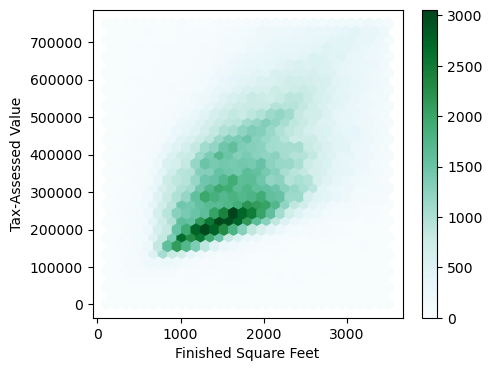

In [31]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y="TaxAssessedValue",\
                         gridsize=30, sharex=False, figsize=(5,4))
ax.set_xlabel("Finished Square Feet")
ax.set_ylabel("Tax-Assessed Value")

Text(0, 0.5, 'Tax-Assessed Value')

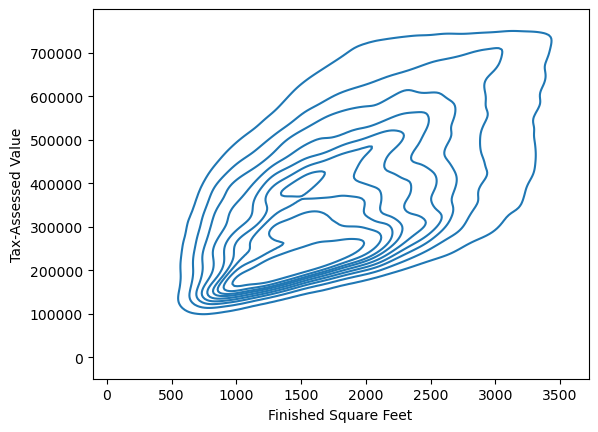

In [38]:
ax = sns.kdeplot(x=kc_tax0.SqFtTotLiving, y=kc_tax0.TaxAssessedValue)
ax.set_xlabel("Finished Square Feet")
ax.set_ylabel("Tax-Assessed Value")

In [37]:
lc_loans = pd.read_csv("lc_loans.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'lc_loans.csv'